<a href="https://colab.research.google.com/github/AaMNAHZaAFAR/Stock-Market-Prediction/blob/main/Top_10_countries_Stock_Exchange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas geopandas matplotlib geopy


  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/3e/b0/69fa7a0f55122847506a42fea6988d03b34136938082f142151bc9d9f7e7/geopandas-0.14.4-py3-none-any.whl.metadata
  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/a9/42/f6149550b2b6916bc2073e5eb28dd8160b097eead8282a3958f02a065c12/fiona-1.9.6-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.1 MB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/30/bd/b9bd3761f08754e8dbb34c5a647db2099b348ab5da338e90980caf280e37/pyproj-3.6.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for shapely>=1.8.0 from https://files.pythonh

In [ ]:
import pandas as pd

# Data from the provided description
data = {
    'Exchange': [
        'New York Stock Exchange',
        'NASDAQ',
        'Shanghai Stock Exchange',
        'Euronext',
        'Japan Exchange Group',
        'Shenzhen Stock Exchange',
        'Hong Kong Stock Exchange',
        'London Stock Exchange Group',
        'National Stock Exchange of India',
        'Saudi Stock Exchange (Tadawul)'
    ],
    'Market Cap (Trillion $)': [
        27.69,
        24.56,
        8.15,
        7.33,
        6.54,
        6.22,
        5.43,
        3.80,
        3.55,
        3.26
    ],
    'Country': [
        'USA',
        'USA',
        'China',
        'Europe',
        'Japan',
        'China',
        'Hong Kong',
        'UK',
        'India',
        'Saudi Arabia'
    ]
}

df = pd.DataFrame(data)



In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="stock_exchange_map")

# Geocode countries
def get_coordinates(country):
    location = geolocator.geocode(country)
    return (location.latitude, location.longitude)

df['Coordinates'] = df['Country'].apply(get_coordinates)
df[['Latitude', 'Longitude']] = pd.DataFrame(df['Coordinates'].tolist(), index=df.index)


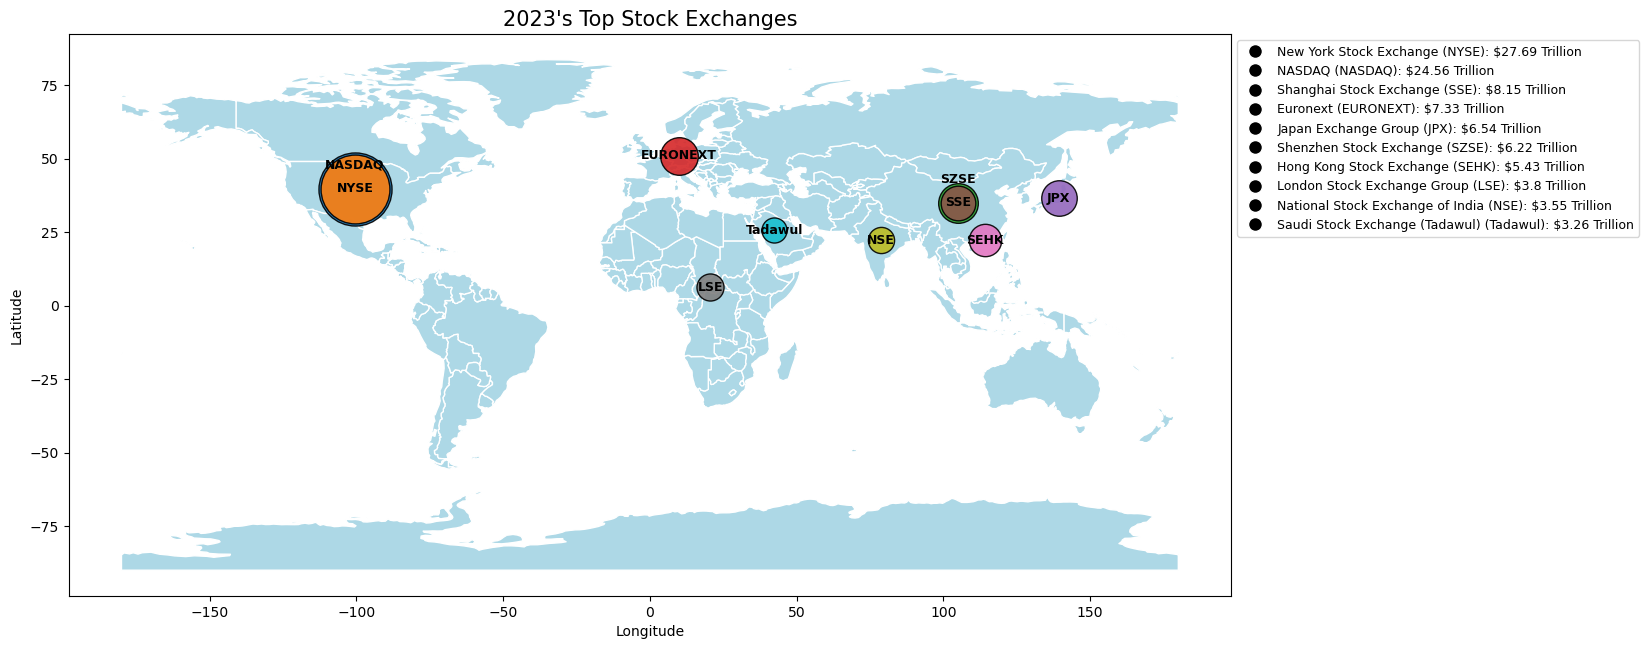

In [ ]:
import matplotlib.pyplot as plt

# Plot world map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightblue', edgecolor='white')

# Track the used coordinates and adjust text position
used_coords = {}

# Plot each exchange with its market cap
for idx, row in df.iterrows():
    plt.scatter(row['Longitude'], row['Latitude'], s=row['Market Cap (Trillion $)']*100, alpha=0.9, edgecolor='black')

    coord = (row['Longitude'], row['Latitude'])
    if coord in used_coords:
        # If the coordinate is already used, adjust the y-position
        offset = used_coords[coord] * 8  # Adjust the value to control the vertical spacing
        plt.text(row['Longitude'], row['Latitude'] + offset, row['Short Name'], fontsize=9, ha='center', va='center', weight='bold')
        used_coords[coord] += 1
    else:
        plt.text(row['Longitude'], row['Latitude'], row['Short Name'], fontsize=9, ha='center', va='center', weight='bold')
        used_coords[coord] = 1

plt.title("2023's Top Stock Exchanges", fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Create custom legend
handles = []
for idx, row in df.iterrows():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', label=f"{row['Exchange']} ({row['Short Name']}): ${row['Market Cap (Trillion $)']} Trillion",
                              markerfacecolor='black', markersize=10))

plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1), fontsize=9)

# Show plot
plt.show()


/var/folders/xm/61n7sq0j0lv1b07_gzqzwj9m0000gn/T/ipykernel_36910/3217807843.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/Users/amnazafar/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/amnazafar/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


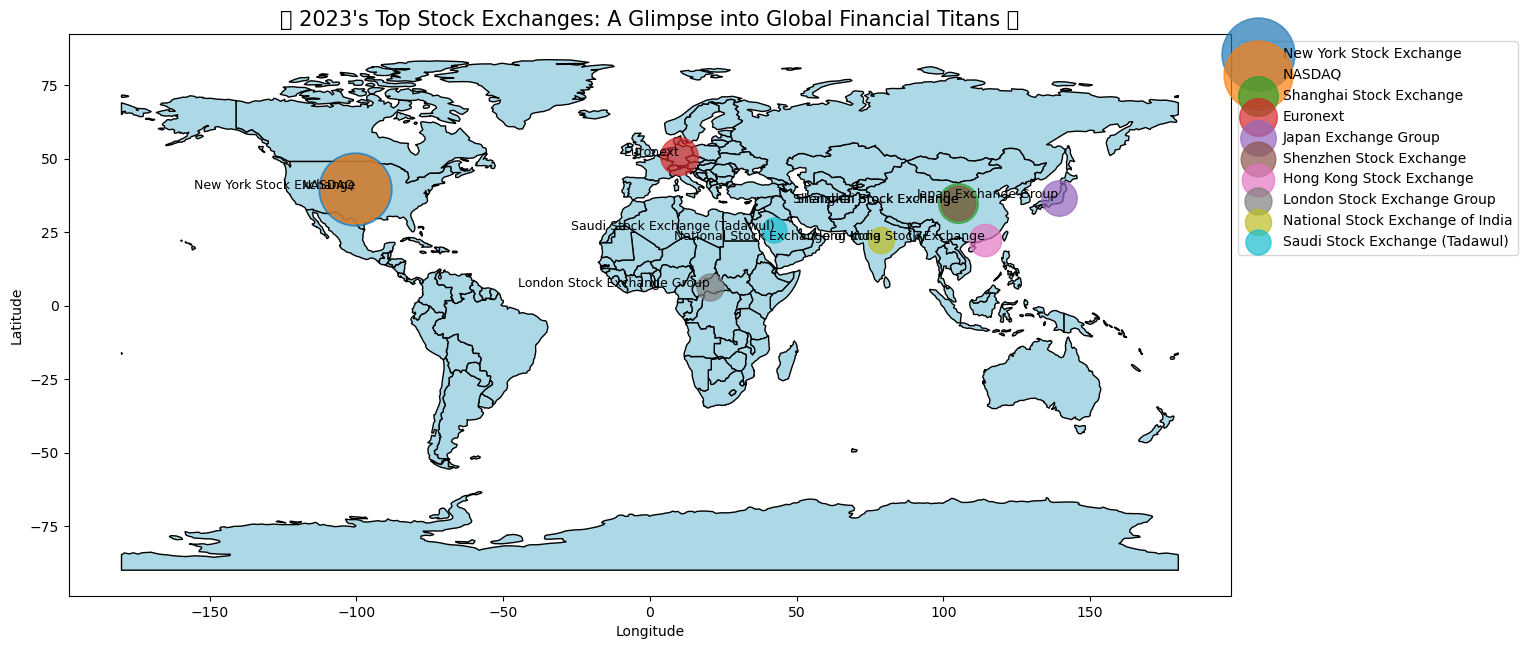

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot world map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightblue', edgecolor='black')

# Plot each exchange with its market cap
for idx, row in df.iterrows():
    plt.scatter(row['Longitude'], row['Latitude'], s=row['Market Cap (Trillion $)']*100, alpha=0.7, label=row['Exchange'])

# Add labels and legend
for idx, row in df.iterrows():
    plt.text(row['Longitude'], row['Latitude'], row['Exchange'], fontsize=9, ha='right')

plt.title("🌟 2023's Top Stock Exchanges: A Glimpse into Global Financial Titans 📊", fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.show()
